In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, r2_score

##Univariate Forecasting

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Walmart Sales Project/data/ts_FB_Walmart_.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.iloc[: , 1:]
df = df.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})

In [ ]:
cut = pd.to_datetime('2012-02-28')
train = df[df['ds'] < cut]
test = df[df['ds'] >= cut]

In [ ]:
train['y_orig'] = train['y'] 
train['y'] = np.log(train['y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head(5)

,ds,y,Holiday_Flag,Fuel_Price,CPI,Unemployment,y_orig
0,2010-02-05,17.722536,0,2.717844,170.725418,8.150133,49750740.50
1,2010-02-12,17.693701,1,2.694022,175.603188,7.419533,48336677.63
2,2010-02-19,17.692466,0,2.672067,171.395827,8.097489,48276993.78
3,2010-02-26,17.598986,0,2.683933,168.354706,8.475289,43968571.13
4,2010-03-05,17.662920,0,2.731200,174.921137,7.508333,46871470.30


In [ ]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data = model.make_future_dataframe(periods=143, freq = 'W')
forecast_data = model.predict(future_data)

In [ ]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,17.693229,17.604816,17.778650
1,2010-02-12,17.711033,17.628617,17.793199
2,2010-02-19,17.683672,17.600438,17.772905
3,2010-02-26,17.654550,17.570122,17.742615
4,2010-03-05,17.643730,17.558242,17.728304


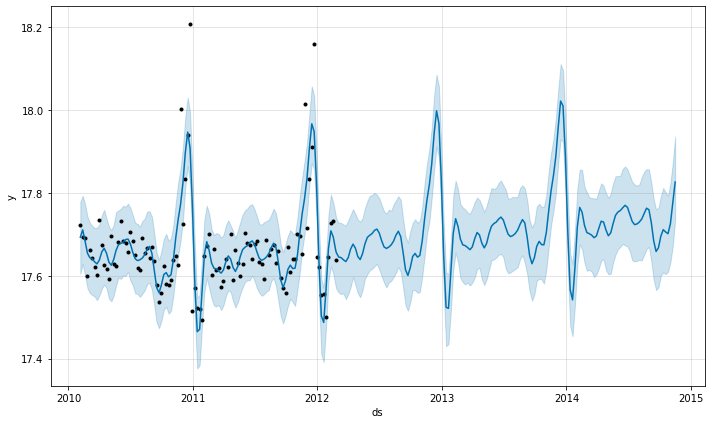

In [ ]:
figure = model.plot(forecast_data)

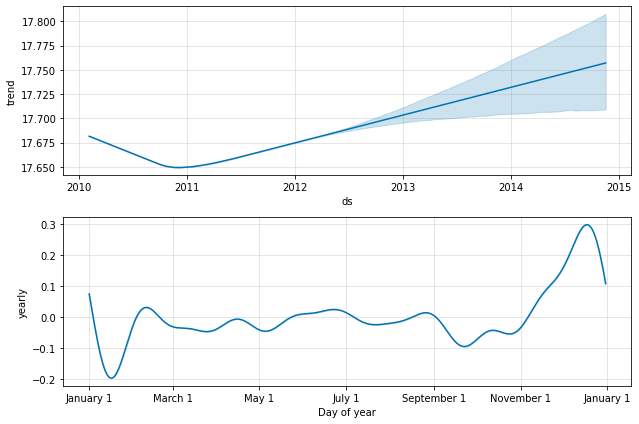

In [ ]:
figure_2 = model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

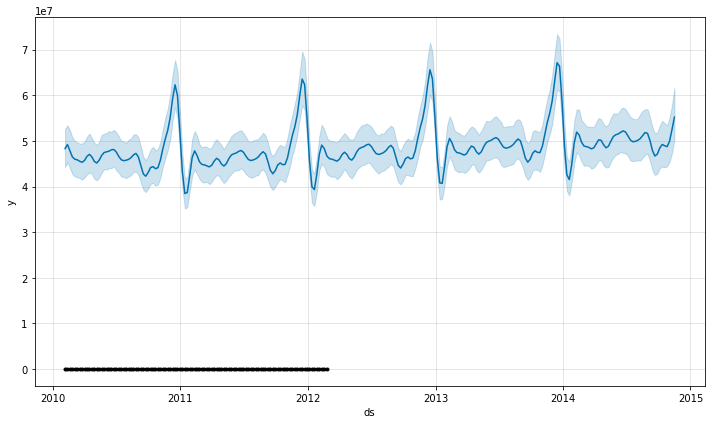

In [ ]:
figure_3 = model.plot(forecast_data_orig)

In [ ]:
train['y_log']=train['y']
train['y']=train['y_orig']
final_df = pd.DataFrame(forecast_data_orig)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

In [ ]:
forecast_data['ds'] = pd.to_datetime(forecast_data['ds'])
train['ds'] = pd.to_datetime(train['ds'])
merged_left = pd.merge(forecast_data, train, on='ds')
metric_df = merged_left.filter(['ds','yhat', 'y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("MAE : % f" %(mean_absolute_error(metric_df.y, metric_df.yhat)))
print("MSE : % f" %(mean_squared_error(metric_df.y, metric_df.yhat)))
print("RMSE : % f" %(np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))))
print("R2-score : % f" %(r2_score(metric_df.y, metric_df.yhat)))

MAE :  2124231.133879
MSE :  14841151594290.902344
RMSE :  3852421.523444
R2-score :  0.605892


###Univariate - Add Seasonality

In [ ]:
holiday_week = df[df['Holiday_Flag'] == 1]
holiday_week = holiday_week.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()
holiday_week

,Date,sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [ ]:
no_holiday_week = df[df['Holiday_Flag'] == 0]
no_holiday_week = no_holiday_week.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()
no_holiday_week

,Date,sales
0,2010-02-05,49750740.50
1,2010-02-19,48276993.78
2,2010-02-26,43968571.13
3,2010-03-05,46871470.30
4,2010-03-12,45925396.51
...,...,...
128,2012-09-28,43734899.40
129,2012-10-05,47566639.31
130,2012-10-12,46128514.25
131,2012-10-19,45122410.57


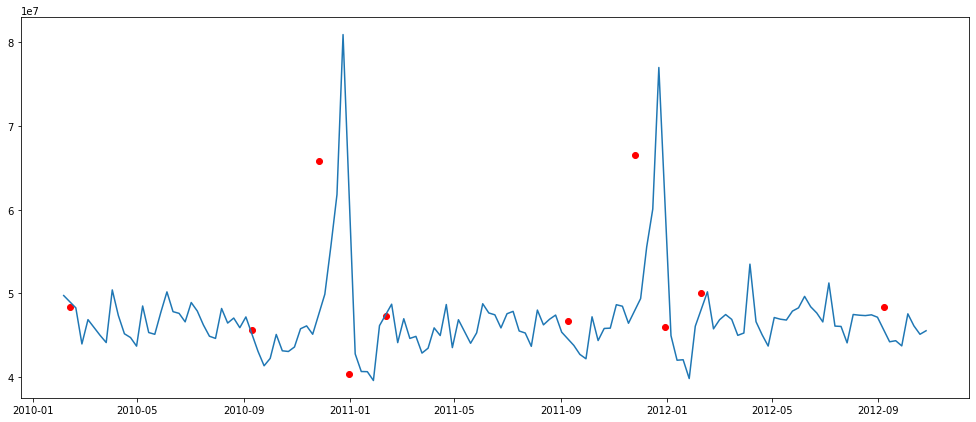

In [ ]:
plt.figure(figsize=(17,7))
plt.scatter(holiday_week['Date'],holiday_week['sales'],c='red');
plt.plot(no_holiday_week['Date'],no_holiday_week['sales']);

In [ ]:
labor_day = pd.DataFrame({
    'holiday':'labor day',
    'ds':pd.to_datetime(['2011-09-09','2013-09-06']),
    'lower_window': 0,
    'upper_window': 0
})

In [ ]:
thanksgiving = pd.DataFrame({
    'holiday':'thanksgiving',
    'ds':pd.to_datetime(['2010-11-26','2011-11-25','2013-11-29']),
    'lower_window': 0,
    'upper_window': 1
})

In [ ]:
christmas = pd.DataFrame({
    'holiday':'christmas',
    'ds':pd.to_datetime(['2010-12-31','2011-12-30','2013-12-27']),
    'lower_window': 0,
    'upper_window': 0
})

In [ ]:
holidays = pd.concat([labor_day,thanksgiving,christmas])
holidays

,holiday,ds,lower_window,upper_window
0,labor day,2011-09-09,0,0
1,labor day,2013-09-06,0,0
0,thanksgiving,2010-11-26,0,1
1,thanksgiving,2011-11-25,0,1
2,thanksgiving,2013-11-29,0,1
0,christmas,2010-12-31,0,0
1,christmas,2011-12-30,0,0
2,christmas,2013-12-27,0,0


In [ ]:
sales = df[['Date','Weekly_Sales']]
sales = sales.rename(columns={'Date':'ds','Weekly_Sales':'y'})

In [ ]:
cut = pd.to_datetime('2012-02-28')
train = sales[sales['ds'] < cut]
test = sales[sales['ds'] >= cut]

In [ ]:
train = train.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})
train['y_orig'] = train['y'] 
train['y'] = np.log(train['y'])

In [ ]:
train.head(5)

,ds,y,y_orig
0,2010-02-05,17.722536,49750740.50
1,2010-02-12,17.693701,48336677.63
2,2010-02-19,17.692466,48276993.78
3,2010-02-26,17.598986,43968571.13
4,2010-03-05,17.662920,46871470.30


In [ ]:
model = Prophet(holidays=holidays, holidays_prior_scale=1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=15*2, freq='M')
forecast = model.predict(future)

In [ ]:
plot_plotly(model, forecast)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
133,2014-03-31,17.687917,17.619027,17.752771
134,2014-04-30,17.701108,17.632894,17.770833
135,2014-05-31,17.732452,17.662145,17.806715
136,2014-06-30,17.761015,17.690626,17.836084
137,2014-07-31,17.716911,17.639198,17.795218


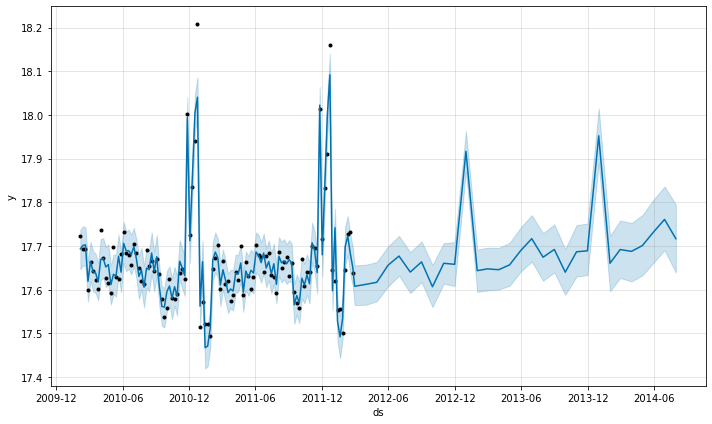

In [ ]:
figure = model.plot(forecast)

Inverse transformation

In [ ]:
forecast_data_orig = forecast # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

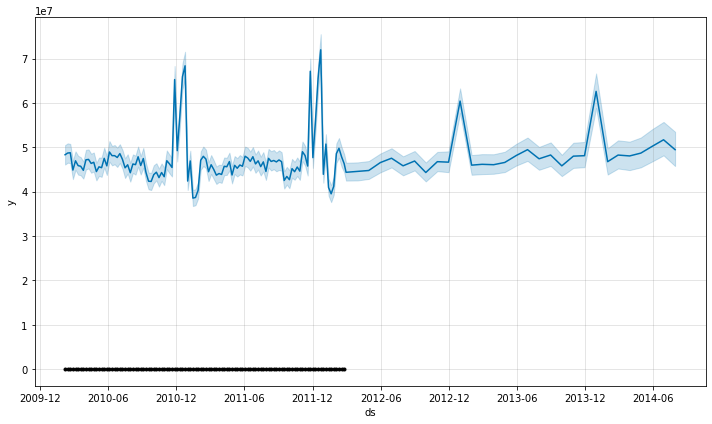

In [ ]:
figure_3 = model.plot(forecast_data_orig)

In [ ]:
train['y_log']=train['y']
train['y'] = train['y_orig']
final_df = pd.DataFrame(forecast_data_orig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

In [ ]:
forecast['ds'] = pd.to_datetime(forecast['ds'])
sales['ds'] = pd.to_datetime(sales['ds'])
merged_left = pd.merge(forecast, sales, on='ds')
metric_df = merged_left.filter(['ds','yhat', 'y'])

In [ ]:
print("MSE : % f" %(mean_squared_error(metric_df.y, metric_df.yhat)))
print("RMSE : % f" %(np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))))
print("R2-score : % f" %(r2_score(metric_df.y, metric_df.yhat)))

MSE :  3881857638274.941895
RMSE :  1970243.040408
R2-score :  0.895963


##Multivariate Forecasting

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Walmart Sales Project/data/ts_FB_Walmart_.csv')
df = df.iloc[: , 1:]
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})

In [ ]:
cut = pd.to_datetime('2012-02-28')
train = df[df['ds'] < cut]
test = df[df['ds'] >= cut]

In [ ]:
train = train.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})
train['y_orig'] = train['y'] 
train['y'] = np.log(train['y'])

train.tail()

,ds,y,Holiday_Flag,Fuel_Price,CPI,Unemployment,y_orig
103,2012-01-27,17.500256,0,3.411556,175.244803,7.508333,39834974.67
104,2012-02-03,17.646011,0,3.451689,167.628269,8.497711,46085608.09
105,2012-02-10,17.727722,1,3.500800,168.025868,8.428578,50009407.92
106,2012-02-17,17.731467,0,3.562511,172.378739,8.097489,50197056.96
107,2012-02-24,17.639172,0,3.620489,173.867632,7.804222,45771506.57


In [ ]:
model_new = Prophet()
model_new.add_regressor('Fuel_Price')
model_new.add_regressor('Unemployment')

In [ ]:
model_new.fit(train)
future_data = model_new.make_future_dataframe(periods=143, freq = 'W')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
246,2014-10-19
247,2014-10-26
248,2014-11-02
249,2014-11-09


In [ ]:
future_data = df[['ds','Fuel_Price','Unemployment']] #'Fuel_Price','CPI','Unemployment']]
future_data.tail()

,ds,Fuel_Price,Unemployment
138,2012-09-28,3.854578,8.428578
139,2012-10-05,3.845222,8.097489
140,2012-10-12,3.896733,7.804222
141,2012-10-19,3.880000,7.237333
142,2012-10-26,3.791489,8.475289


In [ ]:
forecast_data = model_new.predict(future_data)

In [ ]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
138,2012-09-28,17.628437,17.547638,17.720047
139,2012-10-05,17.652902,17.561568,17.743211
140,2012-10-12,17.665231,17.575738,17.747681
141,2012-10-19,17.651630,17.568129,17.737895
142,2012-10-26,17.663300,17.577923,17.746020


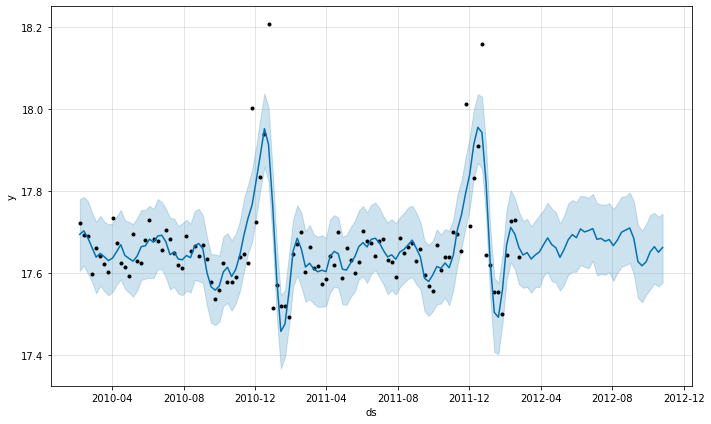

In [ ]:
figure_new_1 = model_new.plot(forecast_data)

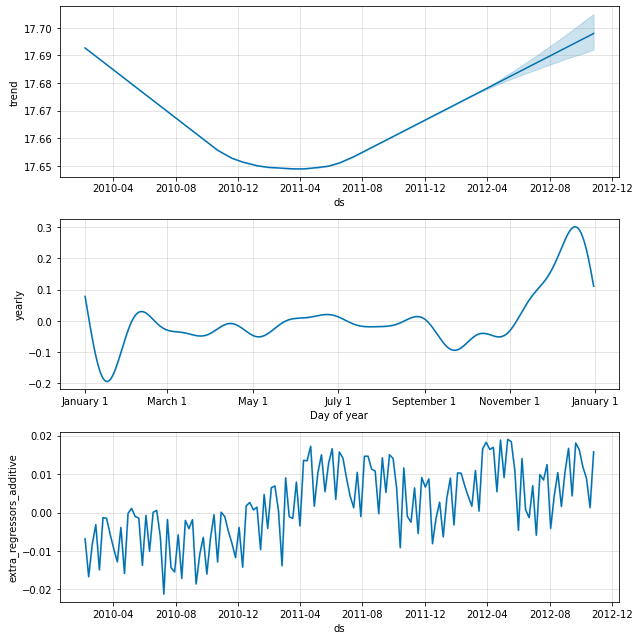

In [ ]:
figure_new_2 = model_new.plot_components(forecast_data)

Inverse transformation

In [ ]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

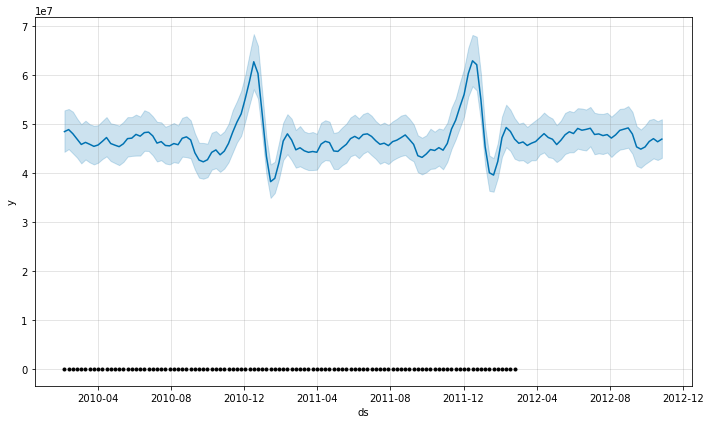

In [ ]:
figure_new_3 = model_new.plot(forecast_data_orig)

In [ ]:
train['y_log']=train['y']
train['y'] = train['y_orig']
final_df2 = pd.DataFrame(forecast_data_orig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df2["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df2["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df2["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

In [ ]:
forecast_data['ds'] = pd.to_datetime(forecast_data['ds'])
train['ds'] = pd.to_datetime(train['ds'])
merged_left = pd.merge(forecast_data, train, on='ds')
metric_df = merged_left.filter(['ds','yhat', 'y'])

In [ ]:
print("MSE : % f" %(mean_squared_error(metric_df.y, metric_df.yhat)))
print("RMSE : % f" %(np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))))
print("R2-score : % f" %(r2_score(metric_df.y, metric_df.yhat)))

MSE :  14721596173296.177734
RMSE :  3836873.228724
R2-score :  0.609067
